In [1]:
from mpasanalysis import *
from e3sm_simulations import *

In [7]:
# get paths of restart files, monthly mean output files, processed climatology files and output figures
ts_yr0 = 21
ts_yr1 = 30
plt_yr0 = 21
plt_yr1 = 30
rest_yr = 31
nmon = 12 # 12 for production and 1 for testing
run = E3SMSimulation(database='e3sm_simulations.xml', runname='conus01')
data_root = run.get_path(comp='ocn', climo_yr0=ts_yr0, climo_yr1=ts_yr1,
                         ts_yr0=ts_yr0, ts_yr1=ts_yr1, rest_yr=rest_yr)
rst_root = data_root['rst_root']
mon_root = data_root['mon_root']
fig_root = data_root['fig_root']
rst_file = rst_root+'/mpaso.rst.{:04d}-01-01_00000.nc'.format(rest_yr)

# load mesh
mpasmesh = MPASMesh(filepath=rst_file)

# transect
trnsct = VerticalTransect('AR7W')
path0 = mpasmesh.get_shortest_path(trnsct.lon0, trnsct.lat0, trnsct.lon1, trnsct.lat1, npoint_ref=2)

varname = 'Transport_AR7W'
fig_dir = fig_root+'/Animation/'+varname
os.makedirs(fig_dir, exist_ok=True)
nv = len(path0.idx_vertex)
transport = np.zeros([plt_yr1-plt_yr0+1, nmon, nv])
for i, y in enumerate(np.arange(plt_yr1-plt_yr0+1)+plt_yr0):
    for j, m in enumerate(np.arange(nmon)+1):
        print('{:04d}-{:02d}'.format(y, m))
        mon_file = mon_root+'/mpaso.hist.am.timeSeriesStatsMonthly.{:04d}-{:02d}-01.nc'.format(y, m)
        print(mon_file)
        mpasdata = MPASOData(filepath=mon_file, filepath_mesh=rst_file)
        transport0, dist0 = mpasdata.get_transport_cumulative(path=path0, varname_prefix='timeMonthly_avg_',
                                                              bolus=True)
        transport[i,j,:] = transport0[0]
# dist = dist0
dist = gc_distance(np.array(path0.lon_vertex), np.array(path0.lat_vertex), trnsct.lon0, trnsct.lat0)

# save data
path_transport = fig_root+'/data_transport_LabSea_AR7W_volume.npz'
np.savez(path_transport, transport=transport, distance=dist)

Pre-defined transect 'AR7W'.
Vertex closest to P0: 304.04520 53.50595
Vertex closest to P1: 311.93221 60.93171
 - Vertex closest to RefP1: 306.33229 56.04188
 - Vertex closest to RefP2: 308.94955 58.49666
0021-01
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0021-01-01.nc
0021-02
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0021-02-01.nc
0021-03
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0021-03-01.nc
0021-04
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0021-04-01.nc
0021-05
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0021-05-01.nc
0021-06
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr

0025-09
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0025-09-01.nc
0025-10
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0025-10-01.nc
0025-11
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0025-11-01.nc
0025-12
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0025-12-01.nc
0026-01
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0026-01-01.nc
0026-02
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0026-02-01.nc
0026-03
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly

0030-06
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0030-06-01.nc
0030-07
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0030-07-01.nc
0030-08
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0030-08-01.nc
0030-09
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0030-09-01.nc
0030-10
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0030-10-01.nc
0030-11
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0030-11-01.nc
0030-12
/lcrc/group/acme/maltrud/archive/A_WCYC1850_ne30_oNAEC60to30cr8L60v1_anvil01/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly

In [8]:
transport.shape

(10, 12, 256)

In [9]:
transport_mean = np.mean(transport, axis=0)

IndexError: index 10 is out of bounds for axis 0 with size 10

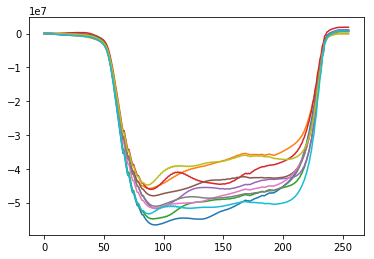

In [11]:
for j in np.arange(30):
    for i in np.arange(1):
        plt.plot(transport[j,i,:])